In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('data.csv')

In [4]:
df.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Company
0,2018-11-29 00:00:00-05:00,43.829761,43.863354,42.639594,43.083508,167080000,0.00,0.0,AAPL
1,2018-11-29 00:00:00-05:00,104.769074,105.519257,103.534595,104.636131,28123200,0.00,0.0,MSFT
2,2018-11-29 00:00:00-05:00,54.176498,55.007500,54.099998,54.729000,31004000,0.00,0.0,GOOGL
3,2018-11-29 00:00:00-05:00,83.749496,84.499496,82.616501,83.678497,132264000,0.00,0.0,AMZN
4,2018-11-29 00:00:00-05:00,39.692784,40.064904,38.735195,39.037853,54917200,0.04,0.0,NVDA


In [5]:
df.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
count,602962.000000,602962.000000,602962.000000,602962.000000,6.029620e+05,602962.00000,602962.000000
mean,140.074711,141.853492,138.276316,140.095204,5.895601e+06,0.00731,0.000344
std,275.401725,279.003191,271.895276,275.477969,1.381596e+07,0.12057,0.050607
min,1.052425,1.061195,1.026114,1.034884,0.000000e+00,0.00000,0.000000
25%,39.566159,40.056222,39.058151,39.563746,1.031500e+06,0.00000,0.000000
50%,79.177964,80.125563,78.193820,79.177906,2.228700e+06,0.00000,0.000000
75%,157.837190,159.746317,155.841609,157.847153,5.277400e+06,0.00000,0.000000
max,6490.259766,6525.000000,6405.000000,6509.350098,1.123003e+09,35.00000,20.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Date          602962 non-null  object 
 1   Open          602962 non-null  float64
 2   High          602962 non-null  float64
 3   Low           602962 non-null  float64
 4   Close         602962 non-null  float64
 5   Volume        602962 non-null  int64  
 6   Dividends     602962 non-null  float64
 7   Stock Splits  602962 non-null  float64
 8   Company       602962 non-null  object 
dtypes: float64(6), int64(1), object(2)
memory usage: 41.4+ MB


In [9]:
df = df[['Close']]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Close   602962 non-null  float64
dtypes: float64(1)
memory usage: 4.6 MB


c:\Users\madha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\madha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


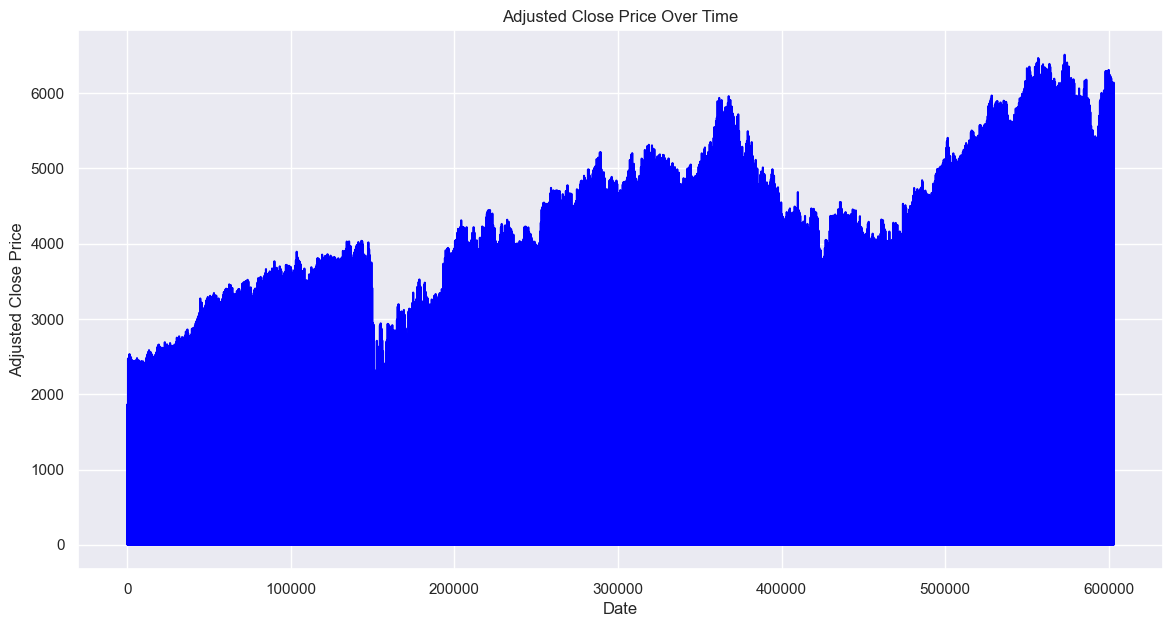

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid") 

plt.figure(figsize=(14, 7))
sns.lineplot(x=df.index, y='Close', data=df, color='blue')
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price')
plt.show()

In [14]:
df['Adj Close Change %'] = df['Close'].pct_change() * 100

C:\Users\madha\AppData\Local\Temp\ipykernel_20580\2929373382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Adj Close Change %'] = df['Close'].pct_change() * 100


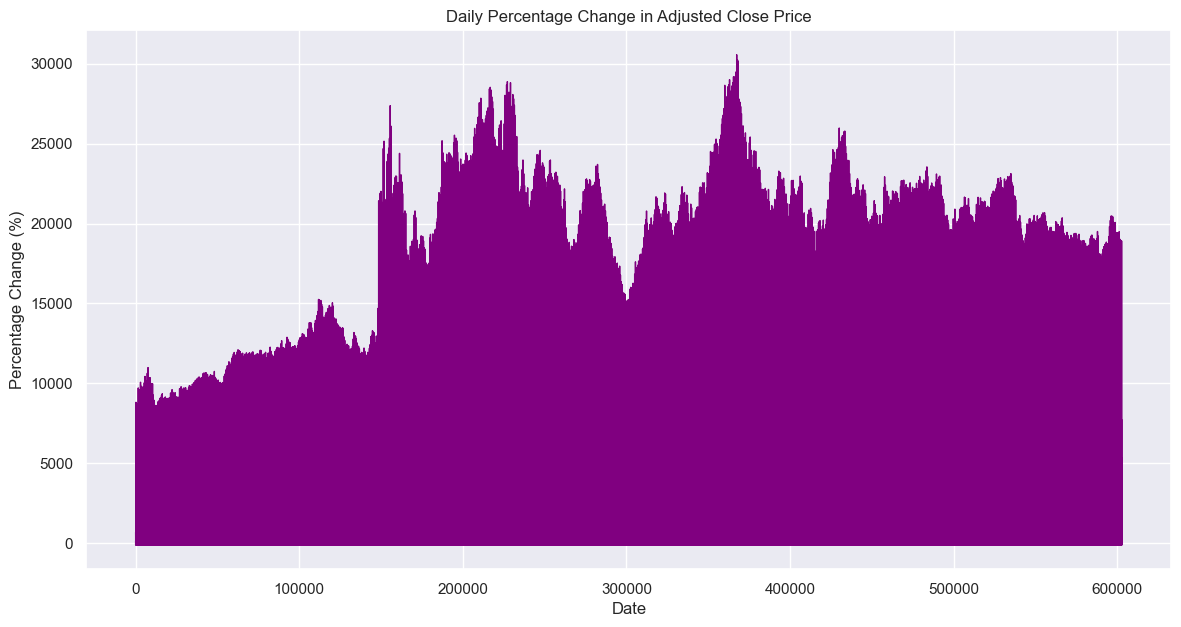

In [15]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['Adj Close Change %'], color='purple', linewidth=1)
plt.title('Daily Percentage Change in Adjusted Close Price')
plt.xlabel('Date')
plt.ylabel('Percentage Change (%)')
plt.grid(True)
plt.show()

In [16]:
initial_value = df['Close'].iloc[0]
final_value = df['Close'].iloc[-1]

cumulative_change = ((final_value - initial_value) / initial_value) * 100

print(f"That's a relative increase of ~{cumulative_change:.2f}%")

That's a relative increase of ~94.71%


In [17]:
import pandas_ta

df.ta.ema(close='Close', length=10, append=True)

C:\Users\madha\AppData\Local\Temp\ipykernel_20580\3176349025.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.ta.ema(close='Close', length=10, append=True)


0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
             ...    
602957    662.429163
602958    547.142042
602959    461.408944
602960    385.554590
602961    330.706483
Name: EMA_10, Length: 602962, dtype: float64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602962 entries, 0 to 602961
Data columns (total 3 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Close               602962 non-null  float64
 1   Adj Close Change %  602961 non-null  float64
 2   EMA_10              602953 non-null  float64
dtypes: float64(3)
memory usage: 13.8 MB


In [19]:
df = df.iloc[10:]

In [20]:
df.isnull().sum()

Close                 0
Adj Close Change %    0
EMA_10                0
dtype: int64

c:\Users\madha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\madha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\madha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\madha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

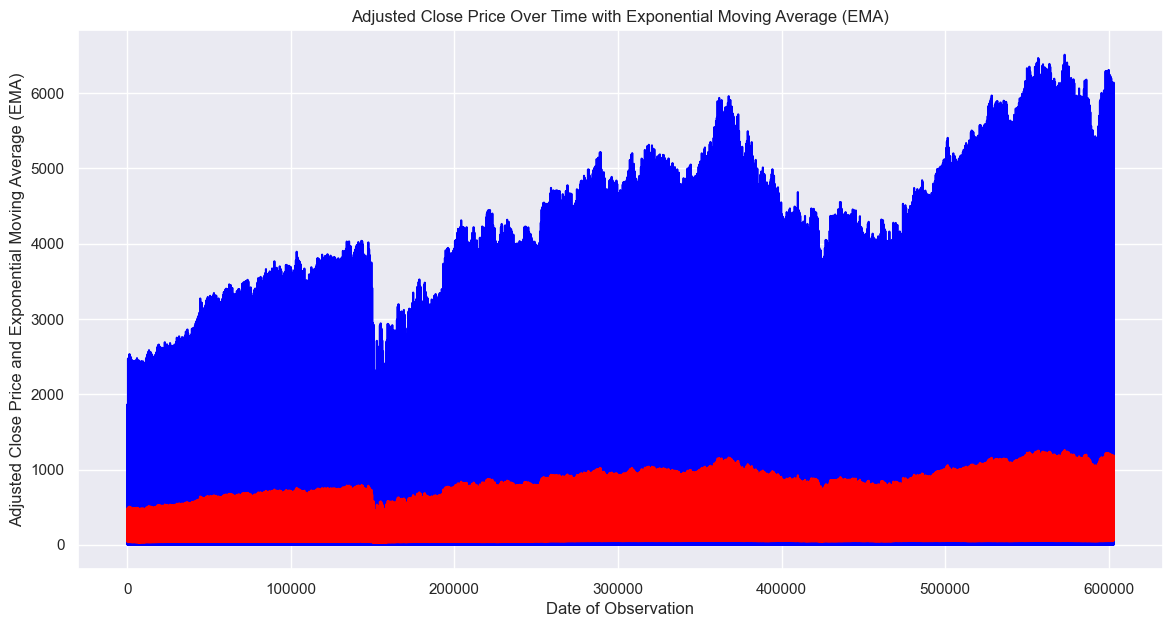

In [21]:

sns.set(style="darkgrid") 

plt.figure(figsize=(14, 7))
sns.lineplot(x=df.index, y='Close', data=df, color='blue')
sns.lineplot(x=df.index, y='EMA_10', data=df, color='red')
plt.title('Adjusted Close Price Over Time with Exponential Moving Average (EMA)')
plt.xlabel('Date of Observation')
plt.ylabel('Adjusted Close Price and Exponential Moving Average (EMA)')
plt.show()

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Close']], df[['EMA_10']], test_size=0.2, random_state=42)

In [25]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

In [26]:

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

print("Model Coefficients:", model.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Coefficient of Determination:", r2_score(y_test, y_pred))

Model Coefficients: [[0.18861213]]
Mean Absolute Error: 47.400728866189375
Coefficient of Determination: 0.32774759790534846


In [27]:
df["pct_change"] = df["Adj Close Change %"]

C:\Users\madha\AppData\Local\Temp\ipykernel_20580\1661903535.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["pct_change"] = df["Adj Close Change %"]


In [28]:
df.columns

Index(['Close', 'Adj Close Change %', 'EMA_10', 'pct_change'], dtype='object')

In [31]:
df['log_returns'] = np.log(df['Close'] / df['Close'].shift(1))
df['normalized'] = (df['Close'] - df['Close'].mean()) / df['Close'].std()

C:\Users\madha\AppData\Local\Temp\ipykernel_20580\3722357954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['log_returns'] = np.log(df['Close'] / df['Close'].shift(1))
C:\Users\madha\AppData\Local\Temp\ipykernel_20580\3722357954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['normalized'] = (df['Close'] - df['Close'].mean()) / df['Close'].std()


In [32]:
n_steps = 10  

X = pd.concat([df['normalized'].shift(i) for i in range(n_steps)], axis=1)

X = X.dropna().values

y = df['normalized'].shift(-1).dropna().iloc[:X.shape[0]].values

In [44]:
from sklearn.decomposition import PCA


pca = PCA(n_components=9)  
X_pca = pca.fit_transform(X)

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(X_pca, y)

y_pred = model.predict(X_pca)

mse = mean_squared_error(y, y_pred)
print(f'Mean Squared Error: {mse}')
print("Coefficient of Determination:", r2_score(y, y_pred))

Mean Squared Error: 0.003222534974141794
Coefficient of Determination: 0.9967749654615456


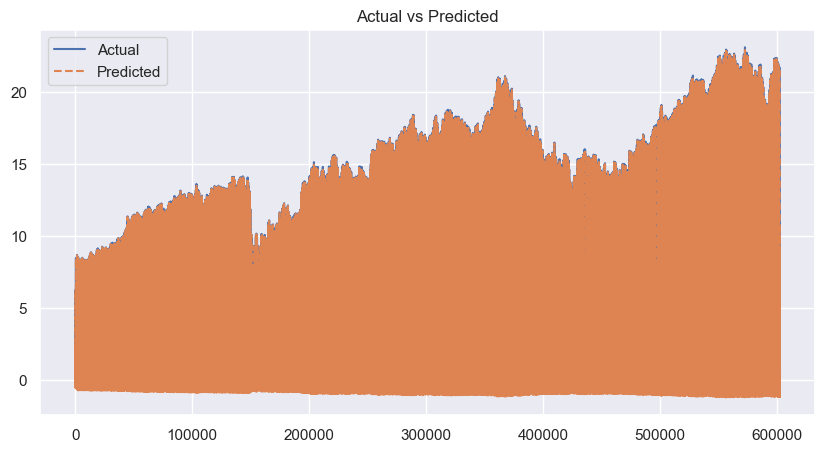

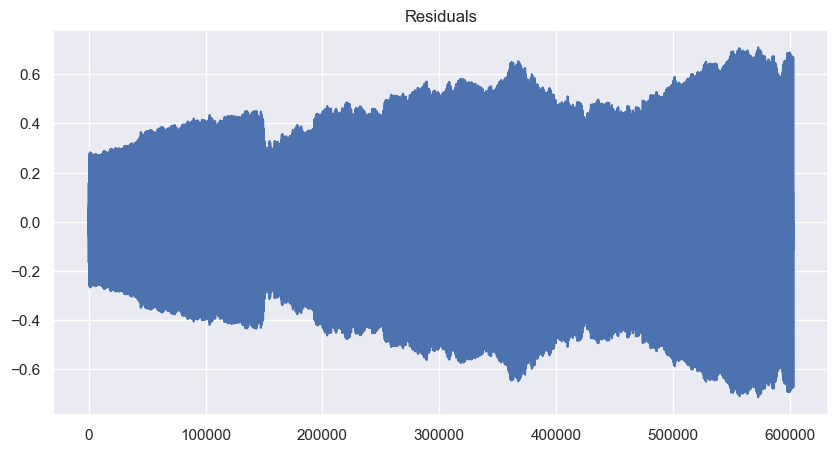

In [46]:
plt.figure(figsize=(10, 5))
plt.plot(y, label='Actual')
plt.plot(y_pred, label='Predicted', linestyle='--')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()

residuals = y - y_pred
plt.figure(figsize=(10, 5))
plt.plot(residuals)
plt.title('Residuals')
plt.show()